In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import functools
import warnings
import seaborn as sns
import pandas as pd
from LinearRegression import LinearRegression as LinReg
warnings.filterwarnings("ignore", category=np.VisibleDeprecationWarning) 

for 1 feature x1 we can get --> [1, x1, (x1, x1), (x1, x1, x1),... (x1, x1, ... m times)] <br>
0 deg -> 1 <br>
1 deg -> x1 <br>
2 deg -> (x1, x1)

In [2]:
def get_combinations(x, degree) : 
    return itertools.combinations_with_replacement(x, degree)

def compute_new_feature(items) : 
    return functools.reduce(lambda x, y : x*y, items)

In [3]:
{items : compute_new_feature(items) for items in get_combinations([1], 3)}

{(1, 1, 1): 1}

In [4]:
{items : compute_new_feature(items) for items in get_combinations([2, 3], 3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [5]:
{items : compute_new_feature(items) for items in get_combinations([1, 4], 4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [6]:
def polynomial_transform(x, degree, logging = False) : 
    # convert to feature matrix 
    if x.ndim == 1 : 
        x = x[:,None]

    x_t = x.transpose()
    feature = [np.ones(len(x))] # populates 1s as first feature for each example 

    if logging : 
        print('Input : ', x)

    for degree in range(1, degree + 1) : 
        for items in get_combinations(x_t, degree) :  # generate combinations
            feature.append(compute_new_feature(items)) # combine feature into a new feature 
            if logging : 
                print(items, " : ", compute_new_feature(items))
    
    if logging : 
        print(np.asarray(feature).transpose())
    
    return np.asarray(feature).transpose()

In [7]:
polynomial_transform(np.array([2]), 3, logging= True)

Input :  [[2]]
(array([2]),)  :  [2]
(array([2]), array([2]))  :  [4]
(array([2]), array([2]), array([2]))  :  [8]
[[1. 2. 4. 8.]]


array([[1., 2., 4., 8.]])

In [8]:
polynomial_transform(np.array([2, 3]), 2, logging= True)

Input :  [[2]
 [3]]
(array([2, 3]),)  :  [2 3]
(array([2, 3]), array([2, 3]))  :  [4 9]
[[1. 2. 4.]
 [1. 3. 9.]]


array([[1., 2., 4.],
       [1., 3., 9.]])

In [9]:
polynomial_transform(np.array([[2, 3], [4, 5]]), 2, logging= True)

Input :  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
[[ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


array([[ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [10]:
polynomial_transform(np.array([[2, 3], [4, 5]]), 3, logging= True)

Input :  [[2 3]
 [4 5]]
(array([2, 4]),)  :  [2 4]
(array([3, 5]),)  :  [3 5]
(array([2, 4]), array([2, 4]))  :  [ 4 16]
(array([2, 4]), array([3, 5]))  :  [ 6 20]
(array([3, 5]), array([3, 5]))  :  [ 9 25]
(array([2, 4]), array([2, 4]), array([2, 4]))  :  [ 8 64]
(array([2, 4]), array([2, 4]), array([3, 5]))  :  [12 80]
(array([2, 4]), array([3, 5]), array([3, 5]))  :  [ 18 100]
(array([3, 5]), array([3, 5]), array([3, 5]))  :  [ 27 125]
[[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   5.  16.  20.  25.  64.  80. 100. 125.]]


array([[  1.,   2.,   3.,   4.,   6.,   9.,   8.,  12.,  18.,  27.],
       [  1.,   4.,   5.,  16.,  20.,  25.,  64.,  80., 100., 125.]])

In [11]:
polynomial_transform(np.array([2]), 0, logging= True)

Input :  [[2]]
[[1.]]


array([[1.]])

In [12]:
def create_nonlin_training_set(func, sample_size, std) : 
    x = np.linspace(0, 1, sample_size)
    y = func(x) + np.random.normal(scale = std, size = x.shape)
    return x, y

def nonlin(x) : 
    return np.sin(2*np.pi * x)

In [13]:
def visualize_training_data(X_train, y_train) : 
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    plt.scatter(X_train, y_train, facecolor = "none", edgecolor='b', s = 50, label = 'training data')
    plt.plot(points, output, c = 'g', label = "$\sin(2\pi x)$")
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def visualize_model_fit(X, y, lin_reg, degree) : 
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0 : 
        plt.scatter(X, y, facecolor = "none", edgecolor = 'b', s = 50, label = 'training data')

        plt.plot(points, output, c = 'g', label = '$\sin(2\pi x)$')

        y_hat = lin_reg.predict(polynomial_transform(points, degree))
        plt.plot(points, y_hat, c = 'r', label = "$h_\mathbf{w}(x)$")
        plt.xlabel('$x_1$')
        plt.ylabel('y')
        plt.ylim(-1.5, 1.5)
        plt.title("M={}".format(degree))

# def visualize_model_fit_reg(X, y, lin_reg, degree, reg_rate) : 
#     points = np.linspace(0, 1, 100)
#     output = nonlin(points)

#     if degree > 0 : 
#         plt.scatter(X, y, facecolor = "none", edgecolor = 'b', s = 50, label = 'training data')

#         plt.plot(points, output, c = 'g', label = '$\sin(2\pi x)$')

#         y_hat = lin_reg.predict(polynomial_transform(points, degree))
#         plt.plot(points, y_hat, c = 'r', label = "$h_\mathbf{w}(x)$")
#         plt.xlabel('$x_1$')
#         plt.ylabel('y')
#         plt.ylim(-1.5, 1.5)
#         plt.title("M={}".format(degree))

def visualize_regularized_model_fit(X, y, lin_reg, degree, lam) : 
    points = np.linspace(0, 1, 100)
    output = nonlin(points)

    if degree > 0 : 
        plt.scatter(X, y, facecolor = "none", edgecolor = 'b', s = 50, label = 'training data')

        plt.plot(points, output, c = 'g', label = '$\sin(2\pi x)$')

        y_hat = lin_reg.predict(polynomial_transform(points, degree))
        plt.plot(points, y_hat, c = 'r', label = "$h_\mathbf{w}(x)$")
        plt.xlabel('$x_1$')
        plt.ylabel('y')
        plt.ylim(-1.5, 1.5)
        plt.title("M={}, λ = {}".format(degree, lam))

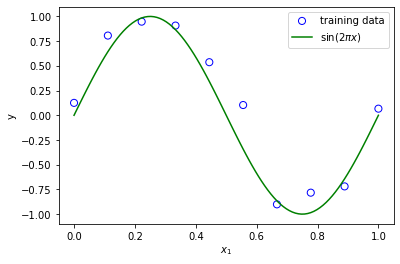

In [14]:
num_samples = 10 
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

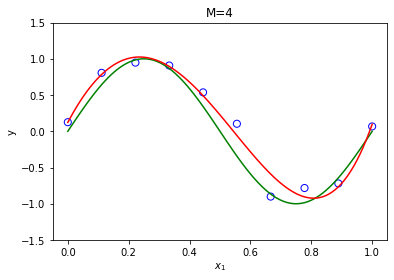

In [15]:
degree = 4
X_transform = polynomial_transform(X, degree)
lin_reg = LinReg()
lin_reg.fit(X_transform, y)
visualize_model_fit(X, y, lin_reg, degree)

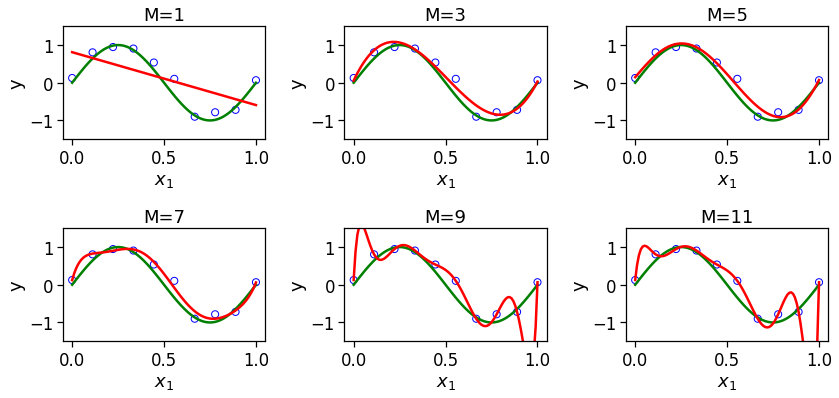

In [16]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 

for i, degree in enumerate([1, 3, 5, 7, 9, 11]) : 
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)
    visualize_model_fit(X, y, lin_reg, degree)

f.tight_layout()
# plt.legend()
plt.show()

In [17]:
def convert_dict_to_df(w_dict, degree) : 
    poly_w_dict = {i : np.array(np.zeros(degree)) for i in range(degree)}
    for deg in poly_w_dict : 
        weight_vec = w_dict[deg]
        for i in range(len(weight_vec)) : 
            poly_w_dict[deg][i] = weight_vec[i]

    poly_w_df = pd.DataFrame(poly_w_dict)
    poly_w_df.columns = ['w_'+str(i) for i in range(degree)]
    return poly_w_df

def plot_model_selection(training_errors, val_errors) : 
    plt.plot(training_errors, 'o-', mfc = 'b', ms=10)
    plt.plot(val_errors, 'o-', mfc = 'none', mec='r', ms=10)
    plt.legend()
    plt.xlabel('degree')
    plt.ylabel('RMSE')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


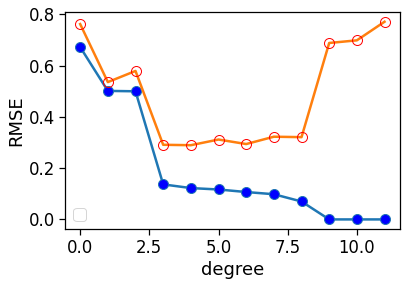

In [18]:
training_errors = []
val_errors = []
w_dict = {}

x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

for i in range(12) : 
    X_transform = polynomial_transform(X, i)
    x_val_transform = polynomial_transform(x_val, i)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)

    w_dict[i] = lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform, y))
    val_errors.append(lin_reg.rmse(x_val_transform, y_val + np.random.normal(
        scale = 0.25, size = len(y_val)
    )))
    
plot_model_selection(training_errors, val_errors)

high variance 

In [19]:
convert_dict_to_df(w_dict, 10)

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9
0,0.109096,0.810511,0.746059,0.057207,0.122088,0.146798,0.129420,0.122443,0.126522,0.125520
1,0.000000,-1.402830,-0.967783,10.373685,7.940647,5.689510,10.327063,17.871774,-11.321581,93.282802
2,0.000000,0.000000,-0.435047,-30.326334,-18.039494,0.725133,-56.489608,-180.983236,407.742587,-2008.436436
3,0.000000,0.000000,0.000000,19.927525,0.219919,-52.821425,193.436186,931.697622,-3508.813728,18254.599244
4,0.000000,0.000000,0.000000,0.000000,9.853803,70.651193,-405.235701,-2492.714962,14258.868775,-87982.743978
5,0.000000,0.000000,0.000000,0.000000,0.000000,-24.318956,398.990750,3443.143923,-31432.043425,247112.086150
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-141.103235,-2350.264704,38337.453869,-417761.690231
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,631.188991,-24279.659115,418108.181522
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6227.712027,-227827.637572
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52012.299911


# Fix over fitting adding more data 

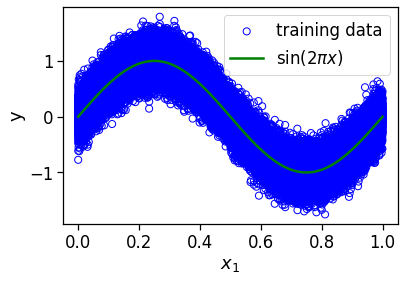

In [20]:
num_samples = 100000 
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

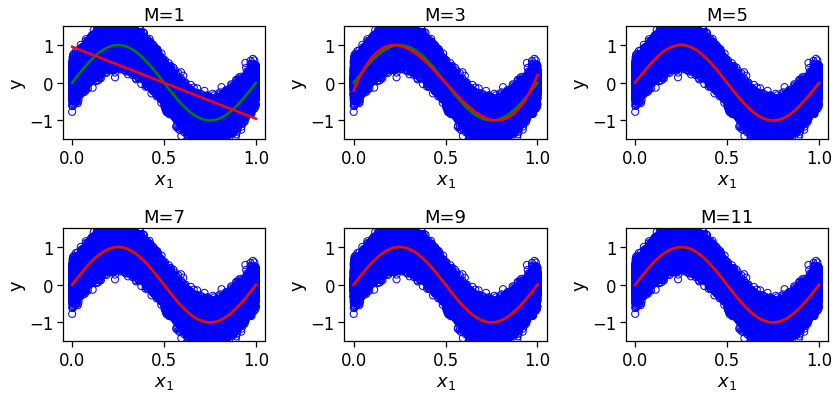

In [21]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 

for i, degree in enumerate([1, 3, 5, 7, 9, 11]) : 
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)
    visualize_model_fit(X, y, lin_reg, degree)

f.tight_layout()
# plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


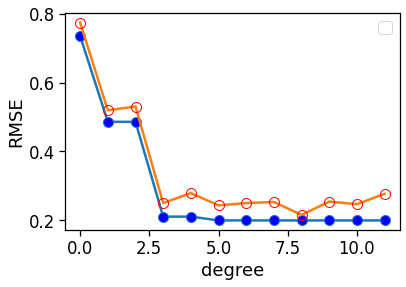

In [22]:
training_errors = []
val_errors = []
w_dict = {}

x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

for i in range(12) : 
    X_transform = polynomial_transform(X, i)
    x_val_transform = polynomial_transform(x_val, i)
    lin_reg = LinReg()
    lin_reg.fit(X_transform, y)

    w_dict[i] = lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform, y))
    val_errors.append(lin_reg.rmse(x_val_transform, y_val + np.random.normal(
        scale = 0.25, size = len(y_val)
    )))
    
plot_model_selection(training_errors, val_errors)

In [23]:
convert_dict_to_df(w_dict, 11)

,w_0,w_1,w_2,w_3,w_4,w_5,w_6,w_7,w_8,w_9,w_10
0,0.000391,0.955106,0.954567,-0.204367,-0.207370,0.014857,0.016875,-0.000503,0.001078,0.001512,0.003884
1,0.000000,-1.909430,-1.906195,12.001352,12.061414,5.394149,5.309402,6.282661,6.168864,6.129728,5.868807
2,0.000000,0.000000,-0.003234,-34.772276,-35.042559,11.629232,12.476729,-0.662818,1.328730,2.189796,9.235279
3,0.000000,0.000000,0.000000,23.179361,23.599803,-100.859240,-104.249269,-31.250447,-45.855501,-53.892376,-135.310178
4,0.000000,0.000000,0.000000,0.000000,-0.210221,139.806552,146.162891,-54.585675,0.183987,39.364440,538.059697
5,0.000000,0.000000,0.000000,0.000000,0.000000,-56.006709,-61.600298,227.478888,113.557195,3.850830,-1791.476031
6,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.864530,-206.915231,-74.006113,108.838872,4098.486413
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59.651360,-21.721685,-200.835684,-5737.516105
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.343261,115.497692,4787.084124
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-21.145429,-2212.756313


# ridge : 

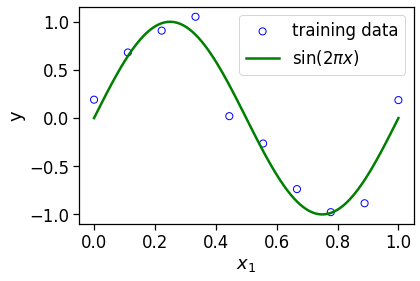

In [24]:
num_samples = 10 
X, y = create_nonlin_training_set(nonlin, num_samples, 0.2)
visualize_training_data(X, y)

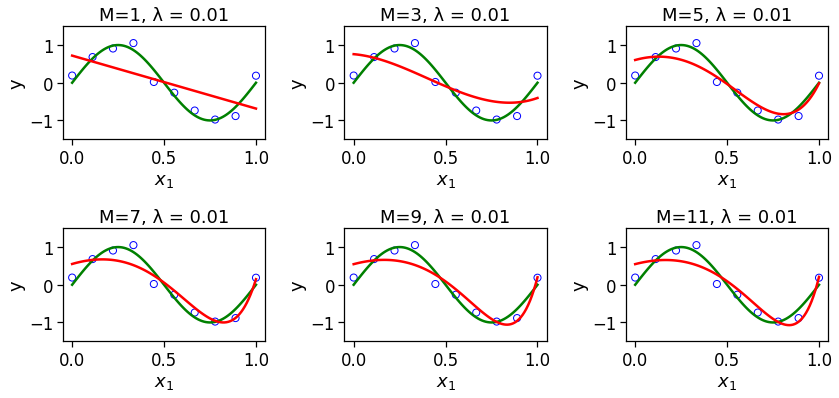

In [25]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 

for i, degree in enumerate([1, 3, 5, 7, 9, 11]) : 
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fitRidge(X_transform, y, reg_rate = 0.01)
    visualize_regularized_model_fit(X, y, lin_reg, degree, 0.01)

f.tight_layout()
# plt.legend()
plt.show()

0 - overfitting <br> 
1 and 10 is underfitting

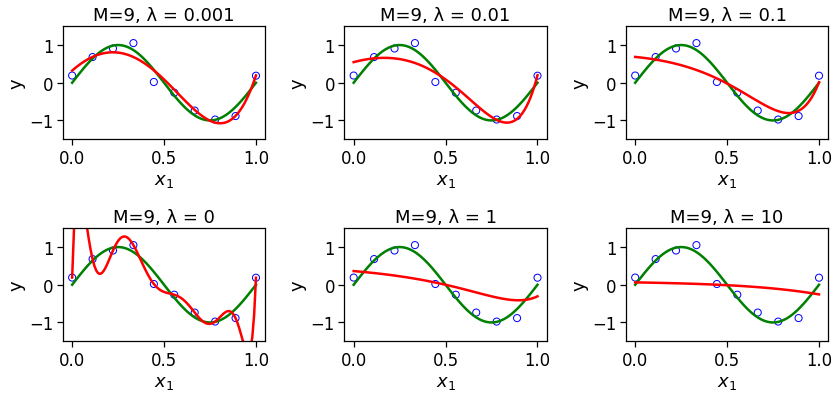

In [26]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 
degree = 9
for i, reg_rate in enumerate([1e-3, 1e-2, 1e-1, 0, 1, 10]) : 
    plt.subplot(3, 3, i+1)
    X_transform = polynomial_transform(X, degree)
    lin_reg = LinReg()
    lin_reg.fitRidge(X_transform, y, reg_rate = reg_rate)
    visualize_regularized_model_fit(X, y, lin_reg, degree, reg_rate)

f.tight_layout()
# plt.legend()
plt.show()

In [27]:
def plot_reg_w(w_df) : 
    ax = plt.gca()
    ax.plot(w_df.T)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('$\lambda$')
    plt.ylabel('$\mathbf{w}$')
    plt.title('weights as a function of $\lambda$')
    plt.axis('tight')
    plt.show()

def plot_learning_curve(err_df) : 
    ax = plt.gca()
    ax.plot(err_df)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('$\lambda$')
    plt.ylabel('RMSE')
    plt.title('training and validation losses as a function of $\lambda$')
    plt.axis('tight')
    plt.legend(['training', 'validation'])
    plt.show()

In [28]:
training_errors = {}
val_errors = {}
w_dict = {}
degree = 9

x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

X_transform = polynomial_transform(X, degree)
x_val_transform = polynomial_transform(x_val, degree)

for reg_rate in [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100] : 
    lin_reg = LinReg()
    lin_reg.fitRidge(X_transform, y, reg_rate = reg_rate)

    w_dict[reg_rate] = lin_reg.w
    training_errors[reg_rate] = lin_reg.rmseRidge(X_transform, y, reg_rate)
    val_errors[reg_rate] = lin_reg.rmseRidge(x_val_transform, y_val + np.random.normal(
        scale = 0.25, size = len(y_val)
    ), reg_rate)

error_df = pd.DataFrame([training_errors, val_errors]).T
w_df = pd.DataFrame(w_dict)

* too much regularization --> both training and validation loss high --> under fitting
* very small regularization --> overfitting 

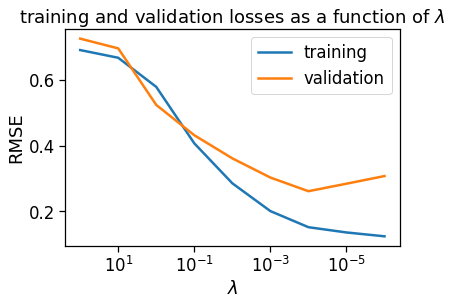

In [29]:
plot_learning_curve(error_df)

9 deg polynomial --> 10 weights <br>
as we reduce the reg rate the weights start increasing --> risk of overfitting 

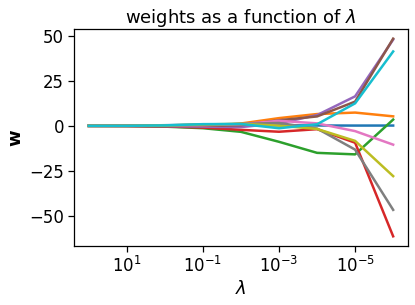

In [30]:
plot_reg_w(w_df)

In [31]:
from sklearn.linear_model import Lasso 

reg_rate = 0.01 
lasso = Lasso(alpha = reg_rate)
lasso.fit(X_transform, y)

lin_reg = LinReg()
_ = lin_reg.fitRidge(X_transform, y, 0)

lasso compresses the weights to 0, only assigns non 0 value to important features. Hence lasso can be used for feature selection

* if you feel most of the features are important then use ridge 

In [32]:
compare_weight_df = pd.DataFrame({'LinReg' : lin_reg.w, 'Ridge' : w_df[0.01], 'Lasso' : lasso.coef_})
compare_weight_df

,LinReg,Ridge,Lasso
0,0.191143,0.546424,0.000000
1,159.292976,1.299890,-0.000000
2,-3529.458526,-3.322335,-2.788253
3,31210.669096,-2.211233,-0.000000
4,-143532.523164,-0.675807,-0.000000
5,381433.423473,0.355544,0.000000
6,-608621.754249,0.900366,0.000000
7,575672.458783,1.117248,0.000000
8,-297504.414836,1.138191,0.000000
9,64712.302181,1.050430,2.129698


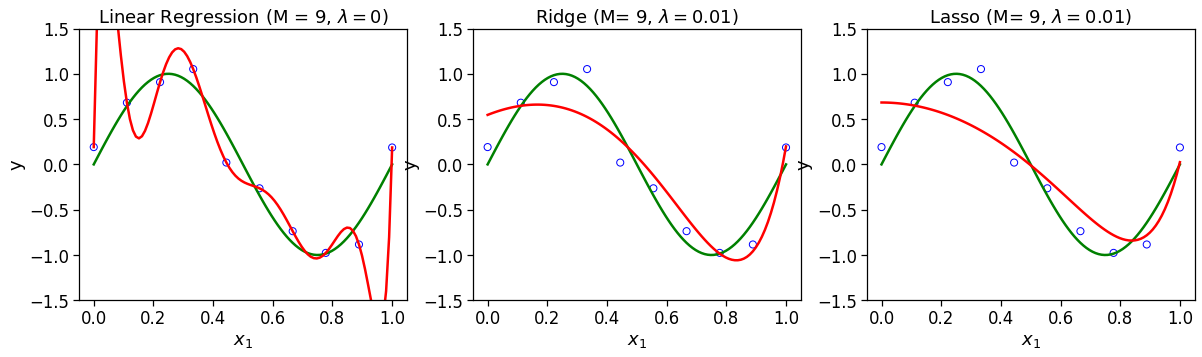

In [33]:
f = plt.figure(figsize= (20, 5))

axl = plt.subplot(1, 3, 1)
visualize_model_fit(X, y, lin_reg, degree)
plt.title('Linear Regression (M = 9, $\lambda = 0$)')

lin_reg.w = w_df[0.01]
ax2 = plt.subplot(1, 3, 2)
visualize_regularized_model_fit(X, y, lin_reg, degree,0.01)
plt.title("Ridge (M= 9, $\lambda = 0.01$)")


ax3 = plt.subplot(1, 3, 3)
visualize_regularized_model_fit(X, y, lasso, degree,0.01)
plt.title("Lasso (M= 9, $\lambda = 0.01$)");

high reg_rate underfitting

C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.182e-03, tolerance: 4.812e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:9: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  if __name__ == "__main__":
C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: UserWarning: Coordinate

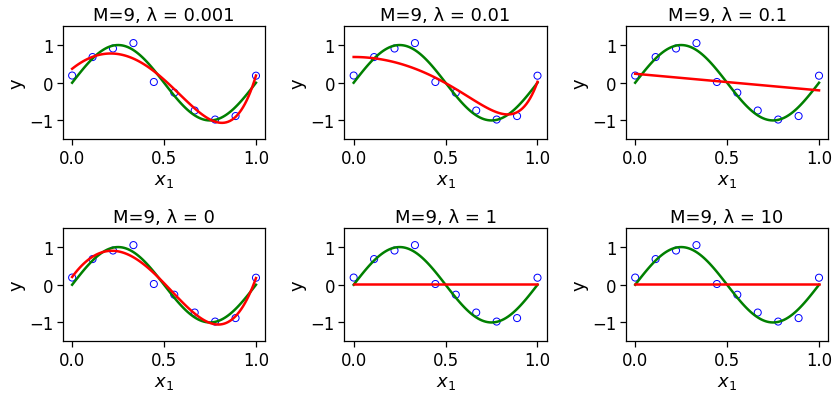

In [34]:
f = plt.figure(figsize = (12, 8))
sns.set_context("notebook", font_scale= 1.5, rc ={"lines.linewidth" : 2.5}); 
degree = 9
X_transform = polynomial_transform(X, degree)

for i, reg_rate in enumerate([1e-3, 1e-2, 1e-1, 0, 1, 10]) : 
    plt.subplot(3, 3, i+1)
    lasso = Lasso(alpha= reg_rate)
    lasso.fit(X_transform, y)
    visualize_regularized_model_fit(X, y, lasso, degree, reg_rate)

f.tight_layout()
plt.show()

In [35]:
from sklearn.metrics import mean_squared_error

training_errors = {}
val_errors = {}
w_dict = {}
degree = 9

x_val = np.linspace(0, 1, 100)
y_val = nonlin(x_val)

X_transform = polynomial_transform(X, degree)
x_val_transform = polynomial_transform(x_val, degree)

for reg_rate in [1e-10, 1e-9,  1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100] : 
    lasso = Lasso(alpha=reg_rate)
    lasso.fit(X_transform, y)

    w_dict[reg_rate] = lasso.coef_

    training_errors[reg_rate] = mean_squared_error(y, lasso.predict(X_transform), squared = False)
    val_errors[reg_rate] = mean_squared_error(y_val + np.random.normal(
        scale = 0.25, size = len(y_val)
    ), lasso.predict(x_val_transform), squared = False)

error_df = pd.DataFrame([training_errors, val_errors]).T
w_df = pd.DataFrame(w_dict)

C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e-01, tolerance: 4.812e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Computer\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.006e-01, tolerance: 4.812e-04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
C:\Users\Computer\AppData\Local\Packages\PythonSoftw

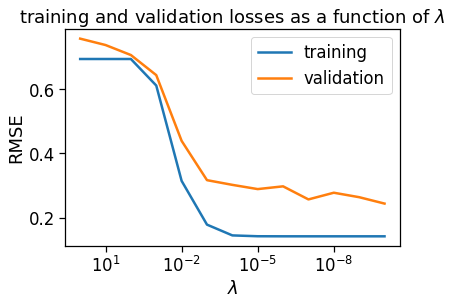

In [36]:
plot_learning_curve(error_df)

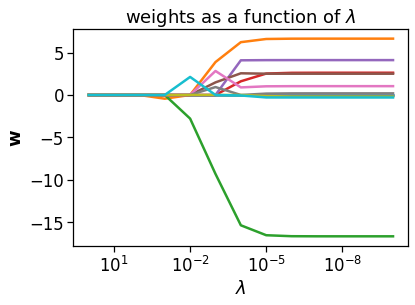

In [37]:
plot_reg_w(w_df)

* linear reg loss function has eliptical cotours 
* ridge has circular contours
* lasso has polytope contours ie why lasso gives sparse solution

## Multi-output / multiLabel

In [38]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split 

X, y, coef = make_regression(
    n_samples = 100, 
    n_features = 10, 
    n_informative = 10, 
    bias = 1, 
    n_targets = 5, 
    shuffle = True, 
    coef = True, 
    random_state = 42)

In [39]:
print(X.shape)
print(y.shape)

(100, 10)
(100, 5)


In [40]:
coef

array([[93.62122462,  5.19712837, 54.12963353, 70.90605195, 87.09691237],
       [89.48166561, 54.75923762, 81.729777  , 45.23182845, 64.35776952],
       [46.26229567, 86.82725054, 72.71690698, 74.27065212, 42.54933344],
       [71.92017783, 22.84547413, 99.63339161, 97.47931621, 65.03256863],
       [19.95424509, 68.02282424,  7.2198409 ,  3.06525022, 25.76828885],
       [52.64026609, 73.15895218,  8.1629982 ,  6.0352084 , 24.7103234 ],
       [15.95446801, 87.17835666, 21.92139874, 97.58652558, 33.68957918],
       [71.40869321, 80.17280831, 33.94501925, 81.48251137,  8.01148464],
       [18.21179157, 78.96985071, 65.87077755, 49.81957165, 55.53635509],
       [16.74825823, 10.45678403, 63.64302495, 70.64757265,  3.15861448]])

In [41]:
def add_dummy_feature(x) : 
    return np.column_stack((np.ones(x.shape[0]), x))

x_dum = add_dummy_feature(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [42]:
lin_reg = LinReg()
w = lin_reg.fitMulti(X_train, y_train, reg_rate)

# np.testing.assert_almost_equal(w[1:, :], coef, decimal = 2)

In [43]:
w

array([[ 39.71897319, -10.30412804,  15.68871887,  22.74940666,
         32.21489546],
       [ 44.55218487,  37.41535069,  43.24257962,  25.45749437,
         34.86656916],
       [ 25.80364932,  42.42980693,  35.58487154,  33.28831398,
         19.36817875],
       [ 27.88022234,   8.21402267,  40.65637185,  38.03685661,
         26.80934285],
       [  5.32524644,  24.71215738,   1.12371944,  -7.79350163,
          7.96986553],
       [ 27.07565647,  34.89509132,   4.78009017,   4.35703416,
         12.06612736],
       [ -1.2101788 ,  26.13606681,   3.20599839,  32.17387947,
          5.54073174],
       [ 34.84118997,  37.78437546,  17.82153137,  38.8125926 ,
          6.03722235],
       [  6.22269852,  34.03389865,  30.5019377 ,  19.97183669,
         21.37521728],
       [  2.48730677,   4.39543691,  21.94128901,  26.76522732,
         -1.4392193 ]])

In [44]:
w = lin_reg.gradient_descent_multi(X_train, y_train, num_epochs=100, lr=0.01)

TypeError: predict() takes 2 positional arguments but 3 were given